In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
from decimal import Decimal
from matplotlib import pyplot as plt

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/LuanVan'

/content/drive/MyDrive/Colab Notebooks/LuanVan


In [ ]:
data_train = pd.read_csv('data/train_house.csv')
data_train

,area,floors,home location,to center,price
0,40.0,3.0,1,0.0,3350000000
1,75.0,3.0,1,0.0,4250000000
2,90.0,3.0,1,4.2,6950000000
3,174.0,1.0,1,18.0,1950000000
4,26.0,2.0,2,0.0,1490000000
...,...,...,...,...,...
182,84.0,2.0,1,0.0,4950000000
183,38.0,2.0,2,0.0,2280000000
184,45.0,4.0,2,0.0,3790000000
185,70.0,2.0,1,9.0,1600000000


In [ ]:
data_test = pd.read_csv('data/test_house.csv')
data_test


,area,floors,home location,to center,price
0,65.0,2.0,1,4.4,3250000000
1,50.0,2.0,2,7.0,2350000000
2,57.0,2.0,1,7.0,2850000000
3,57.0,2.0,2,4.7,2450000000
4,80.0,2.0,1,6.0,2600000000
...,...,...,...,...,...
57,90.0,2.0,1,0.0,4290000000
58,45.0,2.0,2,0.0,2650000000
59,60.0,2.0,2,0.0,2590000000
60,72.0,3.0,1,0.0,5490000000


In [ ]:
def process_price(X):
  for i in range(len(X.price)):
    X.price[i] = str(X.price[i])[:-6]
    X.price[i] = int(X.price[i])

In [ ]:
def scaling_data(X, col):
  for i in range(len(X[col])):
    X[col][i] = (X[col][i] - min(X[col]))/(max(X[col]) - min(X[col]))

In [ ]:
process_price(data_train)
process_price(data_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
scaling_data(data_train, 'area')
scaling_data(data_train, 'floors')
scaling_data(data_train, 'home location')
scaling_data(data_train, 'to center')
data_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,area,floors,home location,to center,price
0,0.043210,0.666667,0,0.000000,3350
1,0.214189,0.700000,0,0.000000,4250
2,0.257051,0.700000,0,0.135484,6950
3,0.497081,0.100000,0,0.580645,1950
4,0.074171,0.487179,1,0.000000,1490
...,...,...,...,...,...
182,0.933301,0.487179,0,0.000000,4950
183,0.421945,0.487179,1,0.000000,2280
184,0.499760,1.000000,1,0.000000,3790
185,0.777671,1.000000,1,1.000000,1600


In [ ]:
scaling_data(data_test, 'area')
scaling_data(data_test, 'floors')
scaling_data(data_test, 'home location')
scaling_data(data_test, 'to center')
data_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,area,floors,home location,to center,price
0,0.539474,0.333333,0,0.488889,3250
1,0.497288,0.454545,1,0.777778,2350
2,0.567851,0.454545,0,0.777778,2850
3,0.567851,0.454545,1,0.522222,2450
4,0.799000,0.454545,0,0.666667,2600
...,...,...,...,...,...
57,1.000000,0.645161,0,0.000000,4290
58,0.623638,0.645161,1,0.000000,2650
59,0.832728,0.645161,1,0.000000,2590
60,1.000000,1.000000,1,0.000000,5490


In [ ]:
X_train = data_train[['area', 'floors', 'home location', 'to center']]
y_train = data_train.price
X_test = data_test[['area', 'floors', 'home location', 'to center']]
y_test = data_test.price

In [ ]:
X_train

,area,floors,home location,to center
0,0.043210,0.666667,0,0.000000
1,0.214189,0.700000,0,0.000000
2,0.257051,0.700000,0,0.135484
3,0.497081,0.100000,0,0.580645
4,0.074171,0.487179,1,0.000000
...,...,...,...,...
182,0.933301,0.487179,0,0.000000
183,0.421945,0.487179,1,0.000000
184,0.499760,1.000000,1,0.000000
185,0.777671,1.000000,1,1.000000


In [ ]:
def find_Param(X, y, a0, a1, a2, a3, a4, lr):
  za1 = 0.0
  za2 = 0.0
  za3 = 0.0
  za4 = 0.0
  za0 = 0.0
  n = len(y)

  for i in range(n):
    za0 += 2*(a0 + a1*X['area'][i] + a2*X['floors'][i] + a3*X['home location'][i] + a4*X['to center'][i] - y[i])

    za1 += 2*X['area'][i] * (a0 + a1*X['area'][i] + a2*X['floors'][i] + a3*X['home location'][i] + a4*X['to center'][i] - y[i])

    za2 += 2*X['floors'][i] * (a0 + a1*X['area'][i] + a2*X['floors'][i] + a3*X['home location'][i] + a4*X['to center'][i] - y[i])

    za3 += 2*X['home location'][i] * (a0 + a1*X['area'][i] + a2*X['floors'][i] + a3*X['home location'][i] + a4*X['to center'][i] - y[i])

    za4 += 2*X['to center'][i] * (a0 + a1*X['area'][i] + a2*X['floors'][i] + a3*X['home location'][i] + a4*X['to center'][i] - y[i])

  a0 -= (za0/n) * lr
  a1 -= (za1/n) * lr
  a2 -= (za2/n) * lr
  a3 -= (za3/n) * lr
  a4 -= (za4/n) * lr

  return a0, a1, a2, a3, a4

In [ ]:
def Loss(X, y, a0, a1, a2, a3, a4):
  sum = 0
  n = len(y)
  for i in range(n):
    sum += (a0 + a1*X['area'][i] + a2*X['floors'][i] + a3*X['home location'][i] + a4*X['to center'][i] - y[i])**2

  return sum/n

In [ ]:
def train(X, y, a0, a1, a2, a3, a4, lr, iter):
  loss_hist = []
  for i in tqdm(range(iter), desc="loading..."):
    a0, a1, a2, a3, a4 = find_Param(X, y, a0, a1, a2, a3, a4, lr)
    mean_sum_loss = Loss(X, y, a0, a1, a2, a3, a4)
    loss_hist.append(mean_sum_loss)

  return a0, a1, a2, a3, a4, loss_hist

In [ ]:
def predict(X, a0, a1, a2, a3, a4):
  y_pred_hist = []
  n = len(X)
  for i in range(n):
    y_pred = a0 + a1*X['area'][i] + a2*X['floors'][i] + a3*X['home location'][i] + a4*X['to center'][i]
    y_pred_hist.append(y_pred)
  return y_pred_hist

In [ ]:
def Rmse(y_pred, y_target):
  n = len(y_pred)
  ans = 0.0
  for i in range(n):
    ans += (y_pred[i] - y_target[i])**2
  return math.sqrt(ans/n)
  
def R2(y_pred, y_target):
  ans1 = 0.0
  ans2 = 0.0
  n = len(y_pred)

  for i in range(n):
    ans1 += (y_target[i] - y_pred[i])**2
    ans2 += (y_target[i] - np.mean(y_target))**2

  return (1 - (ans1/ans2))*100

def Mse(y_pred, y_target):
  ans = 0.0
  n = len(y_pred)

  for i in range(n):
    ans += (y_target[i] - y_pred[i])**2

  return ans/n

In [ ]:
def create_Param():
  q = []
  for i in range(5):
    q.append(Decimal('0.2'))
  return q

In [ ]:
def quality_evalution_model(X, y_target, list_param_a):
  y_pred = predict(X, list_param_a[0], list_param_a[1], list_param_a[2], list_param_a[3], list_param_a[4])

  mse_score = Mse(y_pred, y_target)
  rmse_score = Rmse(y_pred, y_target)
  r2_score = R2(y_pred, y_target)
  list_param = []
  list_param.append(mse_score)
  list_param.append(rmse_score)
  list_param.append(r2_score)

  return list_param

In [ ]:
def improve_training(X, y, q, lr, iter):
  list_param = []
  a0, a1, a2, a3, a4, loss= train(X, y, float(q[0]), float(q[1]), float(q[2]), float(q[3]), float(q[4]), lr, iter)
  
  list_param.append(a0)
  list_param.append(a1)
  list_param.append(a2)
  list_param.append(a3)
  list_param.append(a4)
  
  return list_param

In [ ]:
import csv

def save_csv(name_f, list_trained):
  header = ['a0', 'a1', 'a2', 'a3', 'a4', 'MSE', 'RMSE', 'R2', 'a0_final', 'a1_final', 'a2_finale', 'a3_final', 'a4_final']

  for i in list_trained:
    for j in range(len(i)):
      i[j] = float(i[j])

  with open(name_f, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(list_trained)

In [ ]:
def training(X_train, y_train, X_test, y_test, value_str, lr, iter, name_save):
  list_hist_train = []
  t = 0
  for i in range(6):
    print(i)
    q = create_Param()
    if i == 0:
      list_param_a = improve_training(X_train, y_train, q, lr, iter)
      list_quality = quality_evalution_model(X_test, y_test, list_param_a)
      full_list = q + list_quality + list_param_a
      list_hist_train.append(full_list)
    if t == i:
      continue
    else:
      t = 1
      c = i - 1
      while True:
        if Decimal(q[c]) < Decimal('1'):
          if t <= 5:
            if (t+c-i) == (i-1):
              t += 1
            else:
              q[c] += Decimal(value_str)
              q[t+c-i] -= Decimal(value_str)
              t += 1
              list_param_a = improve_training(X_train, y_train, q, lr, iter)
              list_quality = quality_evalution_model(X_test, y_test, list_param_a)
              full_list = q + list_quality + list_param_a
              list_hist_train.append(full_list)
          else:
            t = 1
        else:
          t = 0
          break

  save_csv(name_save, list_hist_train)
  print('----------Save successfully--------')

In [ ]:
training(X_train, y_train, X_test, y_test, '0.05', 0.001, 50, 'history_scaledata_1904_001_50_v1.csv')

In [ ]:
hist_train_dt = pd.read_csv('history_scaledata_1904_001_50_v1.csv')
hist_train_dt

,a0,a1,a2,a3,a4,MSE,RMSE,R2,a0_final,a1_final,a2_finale,a3_final,a4_final
0,0.20,0.20,0.20,0.20,0.20,7.295734e+06,2701.061726,-338.000252,377.548842,193.919063,227.419625,108.087050,72.415396
1,0.25,0.15,0.20,0.20,0.20,7.295689e+06,2701.053250,-337.997503,377.596387,193.868257,227.418313,108.085877,72.414855
2,0.30,0.15,0.15,0.20,0.20,7.295642e+06,2701.044560,-337.994685,377.644320,193.867332,227.367401,108.084799,72.414326
3,0.35,0.15,0.15,0.15,0.20,7.295530e+06,2701.023805,-337.987954,377.691797,193.866091,227.365868,108.034889,72.413762
4,0.40,0.15,0.15,0.15,0.15,7.295400e+06,2700.999749,-337.980152,377.738336,193.864543,227.363944,108.033386,72.363332
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.05,0.05,0.05,0.05,0.80,7.296679e+06,2701.236652,-338.056986,377.419246,193.778725,227.281436,107.948593,73.015661
77,0.00,0.05,0.05,0.05,0.85,7.296809e+06,2701.260710,-338.064789,377.372707,193.780273,227.283359,107.950095,73.066092
78,0.00,0.00,0.05,0.05,0.90,7.296894e+06,2701.276293,-338.069843,377.373714,193.731015,227.283971,107.950424,73.115981
79,0.00,0.00,0.00,0.05,0.95,7.296977e+06,2701.291662,-338.074827,377.375108,193.731638,227.234983,107.950849,73.165882


In [ ]:
# plt.xlabel('Land Area')
# plt.ylabel('Price')
# plt.plot(X_test['area'], y_test, 'rx')
# # plt.plot(X_test['area'], y_pred, 'blue')
# plt.show()

In [ ]:
a0, a1, a2, a3, a4, loss= train(X_train, y_train, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0001, 50)

loading...: 100%|██████████| 50/50 [00:01<00:00, 25.23it/s]


In [ ]:
y_pred1 = predict(X_test, a0, a1, a2, a3, a4)

In [ ]:
X_train

In [ ]:
y_pred1

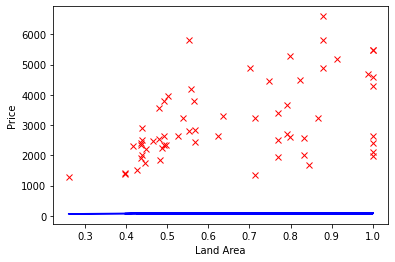

In [ ]:
plt.xlabel('Land Area')
plt.ylabel('Price')
plt.plot(X_test['area'], y_test, 'rx')
plt.plot(X_test['area'], y_pred1, 'blue')
plt.show()